# DATA AUGMENTATION

<img src='images/data-augmentation.jpg'>

## IMPORTER LES LIBRAIRIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from sklearn.model_selection import train_test_split

## DEFINIR LES PARAMETRES

In [2]:
CATEGORIES = ["Chien", "Chat"]


### CHARGEMENT DES DONNEES

In [3]:
#Import des images
pickle_in = open("datasets/features.pickle","rb")
features = pickle.load(pickle_in)


#Import des labels
pickle_in = open("datasets/labels.pickle","rb")
labels = pickle.load(pickle_in)
labels= np.array(labels)


### MISE EN PLACE DES JEUX DE DONNEES

In [4]:
#Création du jeu de test et d'entrainement
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [5]:
# Création du jeu de validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=1)

In [6]:
X_train = X_train.astype("float32") / 127.5 -1
X_test = X_test.astype("float32") / 127.5 -1
X_val = X_val.astype("float32") / 127.5 -1

### AUGMENTATION

LA DOC kERAS SUR LE SUJET : https://keras.io/api/preprocessing/image/

In [7]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [8]:
datagen.fit(X_val)

In [9]:
X_val

array([[[[-0.38823527, -0.32549018, -0.3333333 ],
         [-0.36470586, -0.30196077, -0.3098039 ],
         [-0.36470586, -0.30196077, -0.3098039 ],
         ...,
         [ 0.26274514,  0.24705887,  0.23921573],
         [ 0.28627455,  0.254902  ,  0.24705887],
         [ 0.27058828,  0.27058828,  0.22352946]],

        [[-0.654902  , -0.60784316, -0.6156863 ],
         [-0.7019608 , -0.654902  , -0.6627451 ],
         [-0.6313726 , -0.58431375, -0.5921569 ],
         ...,
         [ 0.2941177 ,  0.27843142,  0.27843142],
         [ 0.27058828,  0.23921573,  0.2313726 ],
         [ 0.30980396,  0.30196083,  0.27843142]],

        [[-0.56078434, -0.5137255 , -0.52156866],
         [-0.84313726, -0.79607844, -0.8039216 ],
         [-0.90588236, -0.85882354, -0.85882354],
         ...,
         [ 0.28627455,  0.27058828,  0.26274514],
         [ 0.27843142,  0.24705887,  0.23921573],
         [ 0.36470592,  0.3411765 ,  0.35686278]],

        ...,

        [[-0.4352941 , -0.38039213, -0

### CREATION DU MODELE

In [10]:
# On importe les modele MobileNet.V2 comme modèle de base
base_model = tf.keras.applications.MobileNetV2(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')

In [11]:
# On vient créer une couche de pooling
sortie_conv =  tf.keras.Sequential()
sortie_conv.add(tf.keras.layers.GlobalAveragePooling2D())
#sortie_conv.add(tf.keras.layers.Flatten())
sortie_conv.add(tf.keras.layers.Dense(1))

In [12]:
# On vient bloquer les poids du modèle de base
base_model.trainable = False


In [13]:
# On combine tout ça pour avoir notre modèle
model = tf.keras.Sequential([
  base_model,
  sortie_conv,
  
])

In [14]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
sequential (Sequential)      (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
history = model.fit(
   datagen.flow(X_val, y_val, batch_size=128),
    epochs=10,
    
)

  ...
    to  
  ['...']
Train for 14 steps
Epoch 1/10
14/14 [==============================] - 12s 891ms/step - loss: 0.6827 - accuracy: 0.5633
Epoch 2/10
14/14 [==============================] - 8s 581ms/step - loss: 0.6410 - accuracy: 0.6068
Epoch 3/10
14/14 [==============================] - 8s 583ms/step - loss: 0.6002 - accuracy: 0.6422
Epoch 4/10
14/14 [==============================] - 8s 582ms/step - loss: 0.5740 - accuracy: 0.6726
Epoch 5/10
14/14 [==============================] - 8s 582ms/step - loss: 0.5399 - accuracy: 0.7006
Epoch 6/10
14/14 [==============================] - 8s 580ms/step - loss: 0.5059 - accuracy: 0.7413
Epoch 7/10
14/14 [==============================] - 9s 625ms/step - loss: 0.4788 - accuracy: 0.7470
Epoch 8/10
14/14 [==============================] - 8s 585ms/step - loss: 0.4515 - accuracy: 0.7693
Epoch 9/10
14/14 [==============================] - 8s 591ms/step - loss: 0.4399 - accuracy: 0.7894
Epoch 10/10
14/14 [==============================] - 8s

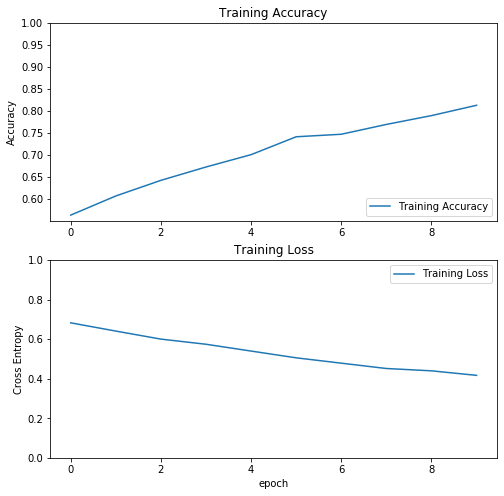

In [17]:
acc = history.history['accuracy']


loss = history.history['loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')

plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')

plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

## FINE TUNING

In [18]:
# On rend les poids initiaux modifiable
base_model.trainable = True

# Par contre on va préciser a partir de ou car pas besoin de modifier tous les poids
fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False



In [19]:
model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])


In [20]:

history_fine = model.fit( datagen.flow(X_val, y_val, batch_size=128),
    epochs=10,
    )


  ...
    to  
  ['...']
Train for 14 steps
Epoch 1/10
14/14 [==============================] - 14s 970ms/step - loss: 0.3578 - accuracy: 0.8672
Epoch 2/10
14/14 [==============================] - 8s 577ms/step - loss: 0.2887 - accuracy: 0.8993
Epoch 3/10
14/14 [==============================] - 8s 584ms/step - loss: 0.2509 - accuracy: 0.9130
Epoch 4/10
14/14 [==============================] - 8s 583ms/step - loss: 0.2235 - accuracy: 0.9239
Epoch 5/10
14/14 [==============================] - 8s 590ms/step - loss: 0.1956 - accuracy: 0.9313
Epoch 6/10
14/14 [==============================] - 8s 605ms/step - loss: 0.1762 - accuracy: 0.9422
Epoch 7/10
14/14 [==============================] - 8s 593ms/step - loss: 0.1625 - accuracy: 0.9388
Epoch 8/10
14/14 [==============================] - 8s 594ms/step - loss: 0.1454 - accuracy: 0.9502
Epoch 9/10
14/14 [==============================] - 8s 584ms/step - loss: 0.1287 - accuracy: 0.9605
Epoch 10/10
14/14 [==============================] - 8s

In [22]:
results = model.evaluate(X_train, y_train, batch_size=128)
print("test loss, test acc:", results)


15715/15715 [==============================] - 24s 2ms/sample - loss: 0.0932 - accuracy: 0.9649
test loss, test acc: [0.09321673689727149, 0.9648743]
